## Explore Data Analysis (EDA) on Bike Sales Europe

In [4]:
from pathlib import Path
import pandas as pd

# cwd = .../AI_ENGINEERING_SUSANNE_WENBLAD/code_alongs/a1_rep
DATA_PATH = Path.cwd().parents[1] / "data"   # upp två nivåer → repo-rot → /data
print(DATA_PATH.resolve(), DATA_PATH.exists())

df = pd.read_csv(DATA_PATH / "Sales.csv", index_col=0, parse_dates=True) #index_col = kolumn 0(1...) är index. Parsar datum för
df.head()


C:\Users\susan\KodPython\ai_engineering_susanne_wenblad\data True


,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
df.info() #Kan göra om datatyp (int64) för att spara minne, ex. int64 --> int8 på month

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113036 entries, 2013-11-26 to 2016-03-04
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Day               113036 non-null  int64 
 1   Month             113036 non-null  object
 2   Year              113036 non-null  int64 
 3   Customer_Age      113036 non-null  int64 
 4   Age_Group         113036 non-null  object
 5   Customer_Gender   113036 non-null  object
 6   Country           113036 non-null  object
 7   State             113036 non-null  object
 8   Product_Category  113036 non-null  object
 9   Sub_Category      113036 non-null  object
 10  Product           113036 non-null  object
 11  Order_Quantity    113036 non-null  int64 
 12  Unit_Cost         113036 non-null  int64 
 13  Unit_Price        113036 non-null  int64 
 14  Profit            113036 non-null  int64 
 15  Cost              113036 non-null  int64 
 16  Revenue           1130

In [65]:
df.isna().sum().sort_values(ascending=True)

Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [68]:
df.describe() #Översikt

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [ ]:
#Method-chaing --> returnerar en dataframe för vare metodanrop
df.describe().T.drop("count", axis=1) #Transponerar - omvänd ordning jämför med ovanstående! (Numerisk översikt?)

,mean,std,min,25%,50%,75%,max
Day,15.665753,8.781567,1.0,8.0,16.0,23.0,31.0
Year,2014.401739,1.272510,2011.0,2013.0,2014.0,2016.0,2016.0
Customer_Age,35.919212,11.021936,17.0,28.0,35.0,43.0,87.0
Order_Quantity,11.901660,9.561857,1.0,2.0,10.0,20.0,32.0
Unit_Cost,267.296366,549.835483,1.0,2.0,9.0,42.0,2171.0
Unit_Price,452.938427,922.071219,2.0,5.0,24.0,70.0,3578.0
Profit,285.051665,453.887443,-30.0,29.0,101.0,358.0,15096.0
Cost,469.318695,884.866118,1.0,28.0,108.0,432.0,42978.0
Revenue,754.370360,1309.094674,2.0,63.0,223.0,800.0,58074.0


In [75]:
duplicates = df[df.duplicated(keep = False)].sort_values(list(df.columns))
print(duplicates)


            Day    Month  Year  Customer_Age             Age_Group  \
Date                                                                 
2014-04-01    1    April  2014            31  Young Adults (25-34)   
2014-04-01    1    April  2014            31  Young Adults (25-34)   
2014-04-01    1    April  2014            59        Adults (35-64)   
2014-04-01    1    April  2014            59        Adults (35-64)   
2016-04-01    1    April  2016            26  Young Adults (25-34)   
...         ...      ...   ...           ...                   ...   
2016-03-31   31    March  2016            49        Adults (35-64)   
2016-05-31   31      May  2016            51        Adults (35-64)   
2016-05-31   31      May  2016            51        Adults (35-64)   
2015-10-31   31  October  2015            43        Adults (35-64)   
2015-10-31   31  October  2015            43        Adults (35-64)   

           Customer_Gender        Country             State Product_Category  \
Date     

In [7]:
df["Product_Category"].value_counts()


Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

In [79]:
import numpy as np

ok_revenue = np.isclose(df["Unit_Price"] * df["Order_Quantity"], df["Revenue"])
ok_cost = np.isclose(df["Unit_Cost"] * df["Order_Quantity"], df["Cost"])
ok_profit = np.isclose(df["Revenue"] - df["Cost"], df["Profit"])

print("Revenue = Price * Quantity: ", ok_revenue.mean())
print("Cost = UnitCost * Quantity: ", ok_cost.mean())
print("Profit=Revenue-Cost:", ok_profit.mean())


bad = df[~(ok_revenue & ok_cost & ok_profit)]
bad.head(10)

Revenue = Price * Quantity:  0.058114229095155526
Cost = UnitCost * Quantity:  1.0
Profit=Revenue-Cost: 1.0


,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086


In [80]:
num_cols = df.select_dtypes(include="number").columns
print("Numeriska kolumner:", list(num_cols))

Numeriska kolumner: ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


In [82]:
neg_number = (df[num_cols] < 0).sum().sort_values(ascending= False)
print("Negativa värden per kolumn:\n", neg_number)

Negativa värden per kolumn:
 Profit            58
Day                0
Year               0
Order_Quantity     0
Customer_Age       0
Unit_Cost          0
Unit_Price         0
Cost               0
Revenue            0
dtype: int64


In [88]:
df["Order_Quantity"].min()

np.int64(1)

In [ ]:
category_columns = df.select_dtypes(include="object").columns.to_list() #Skapar en lista med kolumnnamn jag vill analysera
print("Kategorier: ", category_columns)

Kategorier:  ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']


In [ ]:
cardinality = {c: df[c].nunique() for c in category_columns}    #Ordbokskompresension - bygger en dict, där nyckel är kolumnnamn (c) och värder antal unika värden i kolumnen.
                                                                #– df[c].nunique() räknar unika icke-NA värden (som standard).
print("Antal nivåer per kolumn: ")

for c, n in sorted(cardinality.items(), key=lambda x: x[1], reverse= True): #cardinality.items() ger en iterator av (nyckel, värde)-tupler, t.ex. ("Country", 47)
    print(f"- {c}: {n}")

Antal nivåer per kolumn: 
- Product: 130
- State: 53
- Sub_Category: 17
- Month: 12
- Country: 6
- Age_Group: 4
- Product_Category: 3
- Customer_Gender: 2


In [91]:
for c in category_columns:
    print(f"\n{c} – topp 10:")
    print(df[c].value_counts().head(10))



Month – topp 10:
Month
June        11234
December    11200
May         11128
April       10182
March        9674
January      9284
February     9022
October      8750
November     8734
August       8200
Name: count, dtype: int64

Age_Group – topp 10:
Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

Customer_Gender – topp 10:
Customer_Gender
M    58312
F    54724
Name: count, dtype: int64

Country – topp 10:
Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

State – topp 10:
State
California             22450
British Columbia       14116
England                13620
Washington             11264
New South Wales        10412
Victoria                6016
Oregon                  5286
Queensland              5220
Saarland                2770
Nordrhein-Westfal

In [93]:
rare_threshold = 0.005  # 0.5% av raderna
n = len(df)
for c in category_columns:
    vc = df[c].value_counts(dropna=False)
    rare = vc[vc / n < rare_threshold]
    if not rare.empty:
        print(f"\n{c}: {len(rare)} 'rare' nivåer (<{rare_threshold*100:.1f}% var):")
        print(rare.head(10))



State: 32 'rare' nivåer (<0.5% var):
State
Seine et Marne       394
Moselle              386
Loiret               382
Val d'Oise           264
Garonne (Haute)      208
Brandenburg          198
Val de Marne         158
Charente-Maritime    148
Somme                134
Loir et Cher         120
Name: count, dtype: int64

Sub_Category: 1 'rare' nivåer (<0.5% var):
Sub_Category
Bike Stands    456
Name: count, dtype: int64

Product: 81 'rare' nivåer (<0.5% var):
Product
Racing Socks, L               532
Women's Mountain Shorts, L    516
Road-350-W Yellow, 48         502
Road-250 Black, 52            484
Road-550-W Yellow, 42         480
Road-350-W Yellow, 42         480
Road-550-W Yellow, 44         474
All-Purpose Bike Stand        452
Road-150 Red, 44              418
Road-550-W Yellow, 48         412
Name: count, dtype: int64


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113036 entries, 2013-11-26 to 2016-03-04
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Day               113036 non-null  int64 
 1   Month             113036 non-null  object
 2   Year              113036 non-null  int64 
 3   Customer_Age      113036 non-null  int64 
 4   Age_Group         113036 non-null  object
 5   Customer_Gender   113036 non-null  object
 6   Country           113036 non-null  object
 7   State             113036 non-null  object
 8   Product_Category  113036 non-null  object
 9   Sub_Category      113036 non-null  object
 10  Product           113036 non-null  object
 11  Order_Quantity    113036 non-null  int64 
 12  Unit_Cost         113036 non-null  int64 
 13  Unit_Price        113036 non-null  int64 
 14  Profit            113036 non-null  int64 
 15  Cost              113036 non-null  int64 
 16  Revenue           1130

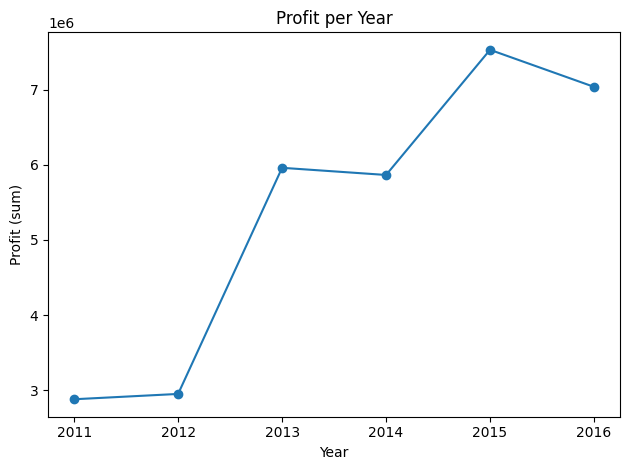

In [102]:
import matplotlib.pyplot as plt

profit_per_year = df.groupby("Year")["Profit"].sum()
profit_per_year.plot(marker="o")
plt.xlabel("Year")
plt.ylabel("Profit (sum)")
plt.title("Profit per Year")
plt.tight_layout()
plt.show()

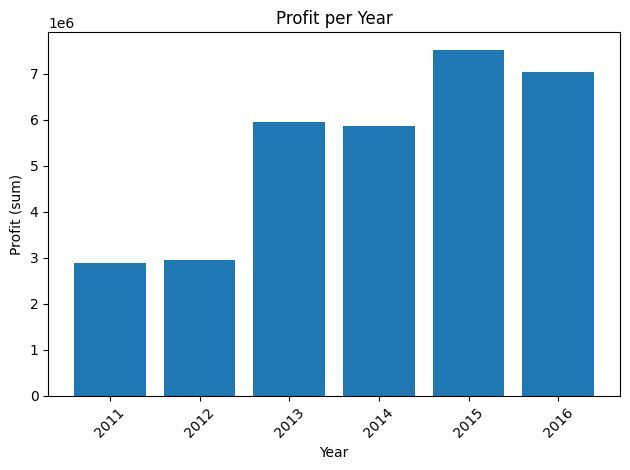

In [105]:

profit_per_year = (df.groupby("Year")["Profit"]
                     .sum()               # eller .mean()
                     .sort_index())

plt.figure()
plt.bar(profit_per_year.index.astype(str), profit_per_year.values)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Profit (sum)")
plt.title("Profit per Year")
plt.tight_layout()
plt.show()

In [12]:
import duckdb

# df_profit = duckdb.query("""
#     SELECT
#         country,
#         SUM(profit) AS Total_profit,
#         MEAN(profit) AS Avg_profit,
#         MEDIAN(profit) AS Median_profit
#     FROM df
#     GROUP BY
#         country
#     ORDER BY
#         total_profit DESC,
#         avg_profit DESC
# """).df()

#df_profit


profit = duckdb.query("""
    SELECT
                      country,
                      SUM(profit) AS total_profit,
                      MEAN(profit) AS avg_profit,
                      MEDIAN(profit) AS median_profit
    FROM df
    GROUP BY
                    country
    ORDER BY
                      total_profit DESC,
                      avg_profit DESC                   
                 

""").df()

profit

,Country,total_profit,avg_profit,median_profit
0,United States,11073644.0,282.447687,87.0
1,Australia,6776030.0,283.089489,114.0
2,United Kingdom,4413853.0,324.071439,134.0
3,Canada,3717296.0,262.187615,83.0
4,Germany,3359995.0,302.756803,134.0
5,France,2880282.0,261.891435,99.0
